# Определение рыночной стоимости автомобиля

# Описание задачи

Необходимо определить рыночную стоимость автомобиля. Для этого имеются следующие данные: технические характеристики, комплектации и цены автомобилей. Нужно построить модель для определения рыночной стоимости автомобиля с учётом качества предсказания, скорости предсказания и времени обучения.

# План работы

1. Подготовка данных
2. Обучение моделей
    1. Кодирование данных и деление на обучающую и тестовую выборки
    2. Создание и обучение модели RandomForestRegressor
    3. Создание и обучение модели LinearRegression
    4. Создание и обучение модели CatBoostRegressor
    5. Создание и обучение модели LightGBM
3. Анализ моделей
    1. Модель RandomForestRegressor
    2. Модель LinearRegression
    3. Модель CatboostRegressor
    4. Модель LightGBM
    5. Вывод
4. Вывод

# Описание данных

**Признаки**
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

**Целевой признак**

Price — цена (евро)

## Подготовка данных

In [210]:
# Импорт библиотек и функций
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 

In [211]:
# Чтение таблицы данных
data = pd.read_csv('datasets/autos.csv')

In [212]:
#Просмотр таблицы и оценка ее размеров
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [213]:
# Вывод сводной информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

В таблице есть пропуски у следующих признаков: "VehicleType", "Gearbox", "Model", "FuelType", "NotRepaired". 

In [214]:
#Количество пропусков nan
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Все указанные признаки являются категориальными, заполним их значением "unknown".

In [215]:
#Заполнение пропусков nan значением "unknown"
data['VehicleType'] = data['VehicleType'].fillna('unknown')
data['Gearbox'] = data['Gearbox'].fillna('unknown')
data['Model'] = data['Model'].fillna('unknown')
data['FuelType'] = data['FuelType'].fillna('unknown')
data['NotRepaired'] = data['NotRepaired'].fillna('unknown')

In [216]:
#Повторная проверка на пропуски
data.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

Удаление столбцов:

Столбцы с типом данных "дата и время" не обрабатываются моделью при ее обучении. Поэтому удалим их.

In [217]:
#Удалим столбцы с типом данных "дата и время"
data = data.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis = 1)

Столбец "NumberOfPictures" содержит одно уникальное значение равное нулю:

In [218]:
#Уникальные значения в столбце "NumberOfPictures"
data['NumberOfPictures'].unique()

array([0], dtype=int64)

Поэтому столбец "NumberOfPictures" можно тоже удалить:

In [219]:
#Удаление столбца "NumberOfPictures"
data = data.drop(['NumberOfPictures'], axis = 1)

Столбец "PostalCode" содержит почтовый индекс владельца анкеты (пользователя), что является уникальными данными пользователя и для обучение модели бесполезно. Поэтому данный столбец тоже можно удалить:

In [220]:
#Удаление столбца "PostalCode"
data = data.drop(['PostalCode'], axis = 1)

Далее исследуем данные на наличие некорректных значений и заменим их.

In [221]:
#Проверка на наличие слишком низких значений года регистрации
data[data['RegistrationYear'] < 1920]["RegistrationYear"].unique()

array([1910, 1111, 1000, 1500, 1800, 1234, 1400, 1200, 1255, 1001, 1688,
       1253, 1919, 1600, 1039, 1300, 1915, 1602], dtype=int64)

In [222]:
#Проверка на наличие слишком больших значений года регистрации
data[data['RegistrationYear'] > 2020]["RegistrationYear"].unique()

array([5000, 9999, 3200, 8888, 2200, 4100, 3000, 2066, 8000, 5300, 9000,
       2900, 6000, 5900, 5911, 4000, 8500, 3700, 3800, 4800, 7000, 6500,
       2290, 2500, 9450, 2800, 5555, 5600, 2222, 9996, 8455, 4500, 7800,
       9229, 7100, 8200, 7500, 3500], dtype=int64)

Строки с некорректными значениями года регистрации автомобиля можно было бы удалить, но в таком случае значения RMSE у обученных моделей получаются хуже. Поэтому заменим их на ближайшие корректные.

Далее описана функция, заменяющая некорректные значения года регистрации на ближайшие корректные.

In [227]:
#Функция замены некорректных значений года регистрации на ближайшие корректные значения
def RegistrationYear_replace(value):
    if value > 2020:
        return 2020
    elif value < 1920:
        return 1920
    else:
        return value

In [228]:
#Замена некорректных значений года регистрации на ближайшие корректные
data["RegistrationYear"] = data["RegistrationYear"].apply(RegistrationYear_replace)

In [229]:
#Уникальные значения месяца регистрации
data["RegistrationMonth"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

В столбце "RegistrationMonth" присутствует некорректное значение 0. Заменим его на ближайшее корректное значение, то есть на 1.

In [230]:
# Замена в столбце "RegistrationMonth" некорректного значения 0 на 1.
data.loc[data['RegistrationMonth'] == 0, 'RegistrationMonth'] = 1

In [231]:
#Проверка значений столбца "Power" на слишком большие значения.
data[data['Power'] > 3000]["Power"].unique()

array([ 7515, 10317, 10520,  6920,  7512, 10218,  7544,  5411,  3750,
       11530,  5000, 12012, 17932, 12510, 10912, 15016,  6226,  8404,
        4400, 10710, 10522,  9010, 11509, 11635, 10000,  5575, 19211,
        3199,  7508,  4700,  3454, 19208,  8011,  6006,  3500,  5815,
        6018,  5809, 15020,  5867, 17410,  6011, 15001,  6045,  6010,
       17011, 16051,  9000, 10311, 17019, 12684,  8259, 17700, 11011,
       15033,  6512, 13616, 16312, 20000,  6012, 13636,  9710,  6062,
       16011, 12512,  9013,  9011, 15017, 10910, 11025, 14009, 11111,
        9007,  5420,  7511, 19312,  9012, 16311,  7529,  8500, 10110,
        4507,  7518], dtype=int64)

In [232]:
#Проверка столбца "Power" на слишком малые значения
data[data['Power'] < 100]["Power"].unique()

array([ 0, 75, 69, 50, 60, 90, 99, 70, 95, 61, 80, 55, 64, 82, 54, 87, 86,
       84, 77, 88, 45, 41, 98, 56, 58, 83, 85, 73, 68, 66, 74, 52, 65, 71,
       97,  5, 63, 81, 44, 59, 39, 92, 51, 53, 43, 67, 72, 23, 96, 26, 37,
       33, 94, 48, 40, 79, 57, 30,  7, 47, 78, 91, 89, 76, 93, 16, 46, 35,
       34,  2, 18, 62, 10, 15, 22, 42,  4, 21,  1, 24, 29, 38, 14, 49, 27,
       20, 11, 25, 12, 17,  9, 13,  8, 19,  6,  3, 32, 36, 31, 28],
      dtype=int64)

В столбце "Power" присутствует множество слишком больших и слишком малых значений. Строки с такими значениями можно было бы удалить, но это приведет к ухудшению значений RMSE обученных моделей. Поэтому, некорректные значения заменим на ближайшие корректные.

In [237]:
#Замена в столбце "Power" слишком больших значений
data.loc[data['Power'] > 3000, 'Power'] = 3000

In [238]:
#Замена в столбце "Power" слишком малых значений
data.loc[data['Power'] < 100, 'Power'] = 100

Просмотрим статистические характеристики данных в столбцах.

In [239]:
#Статистические характеристики данных в столбцах
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2003.077194,129.067969,128211.172535,5.820049
std,4514.158514,7.591811,73.734474,37905.341530,3.574326
min,0.000000,1920.000000,100.000000,5000.000000,1.000000
25%,1050.000000,1999.000000,100.000000,125000.000000,3.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000
max,20000.000000,2020.000000,3000.000000,150000.000000,12.000000


<AxesSubplot:>

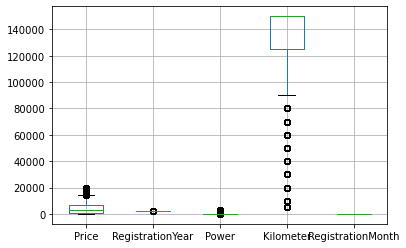

In [240]:
#Ящик с усами для исследования распределения данных в столбцах
data.boxplot()

Из графика видно, что имеются выбросы в столбцах "Price","Power" и "Kilometer"

Удалим выбросы в указанных столбцах, удаляя строки. Без удаления выбросов значения RMSE обученных моделей в дальнейшем окажутся хуже.

In [241]:
#Функция удаления выбросов
def vybrosy_del(data,column):
    q25=np.array(data[column].quantile(0.25))
    
    q75=np.array(data[column].quantile(0.75))
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    del_index = []
    for index_value, value in zip(data[column].index,data[column]):
        if second_part <= value or value <= first_part:
            del_index.append(index_value)
    
    print('Количество строк для удаления ' + str(column)+":",len(del_index))
    return del_index

In [242]:
#Удаление выбросов в столбцах "Price","Power","Kilometer"
array_num_col = ["Price","Power","Kilometer"]
count = 0 
for column in array_num_col:
    index_del = vybrosy_del(data,column)
    count += len(index_del)
    data = data.drop(index_del,axis = 0)
print("Было удалено:", count)

Количество строк для удаления Price: 18979
Количество строк для удаления Power: 18762
Количество строк для удаления Kilometer: 43285
Было удалено: 81026


## Обучение моделей

### Кодирование данных и деление на обучающую и тестовую выборки

In [243]:
#Кодирование данных
data_ohe = data.copy()
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

In [244]:
#Выделение основных признаков и целевого признака не обработанных кодированием
features = data.drop('Price', axis=1)
target = data['Price']

In [245]:
# Выделение в таблице основных признаков и целевого обработанных кодированием
features_ohe = data_ohe.drop('Price', axis=1)
target_ohe = data_ohe['Price']

In [246]:
#Выделение обучающей и тестовой выборок не обработанных кодированием
features_train,features_test,target_train,target_test = train_test_split(features,
                                             target,
                                             test_size = 0.25,
                                             random_state = 12345)

In [247]:
#Выделение обучающей и тестовой выборок обработанных кодированием
features_ohe_train,features_ohe_test,target_ohe_train,target_ohe_test = train_test_split(features_ohe,
                                             target_ohe,
                                             test_size = 0.25,
                                             random_state = 12345)

Было выполнено кодирование категориальных признаков.

### Создание и обучение модели RandomForestRegressor

In [258]:
#Создание модели случайного леса для поиска лучших значений ее параметров
model_rfr = RandomForestRegressor()

In [259]:
#Список параметров и диапазоны значений для определения наилучших для модели
parameters = {'n_estimators': range (5, 15, 5),
              'max_depth': range (5,15, 5)}

In [260]:
#Для определения наилучших значений параметров модели используем функцию GridSearchCV
grid = GridSearchCV(model_rfr, parameters, cv=5, scoring='neg_mean_squared_error')

In [261]:
#Поиск лучших значений параметров модели
grid.fit(features_ohe_train, target_ohe_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 15, 5),
                         'n_estimators': range(5, 15, 5)},
             scoring='neg_mean_squared_error')

In [262]:
#Вывод лучших значений параметров модели
grid.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [263]:
#Создание модели случайного леса с использованием найденных значений ее параметров
model_rfr = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=10)

In [264]:
%%time
#Обучение модели случайного леса
model_rfr.fit(features_ohe_train,target_ohe_train)

Wall time: 35.8 s


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=12345)

### Создание и обучение модели LinearRegression

In [265]:
#Создание модели LinearRegression
model_lr = LinearRegression()

In [266]:
%%time
#Обучение модели LinearRegression
model_lr.fit(features_ohe_train, target_ohe_train)

Wall time: 4.08 s


LinearRegression()

### Создание и обучение модели CatBoostRegressor

In [267]:
# Создание модели catboostregressor
model_catboost  = CatBoostRegressor(loss_function='RMSE')

In [268]:
#Указание для модели категориальных признаков обучающей выборки
cat_features = ['VehicleType', 'Gearbox', 'Model','FuelType', 'NotRepaired', 'Brand']

In [269]:
%%time
#Обучение модели CatBoostRegressor
model_catboost.fit(features_train, target_train, cat_features) 

Learning rate set to 0.094938
0:	learn: 2827.7241552	total: 214ms	remaining: 3m 34s
1:	learn: 2682.0336352	total: 402ms	remaining: 3m 20s
2:	learn: 2554.2419310	total: 543ms	remaining: 3m
3:	learn: 2437.9126658	total: 698ms	remaining: 2m 53s
4:	learn: 2330.6790919	total: 847ms	remaining: 2m 48s
5:	learn: 2242.5204300	total: 1.02s	remaining: 2m 49s
6:	learn: 2157.0546484	total: 1.18s	remaining: 2m 47s
7:	learn: 2084.2284349	total: 1.33s	remaining: 2m 44s
8:	learn: 2021.2605953	total: 1.48s	remaining: 2m 42s
9:	learn: 1966.9342901	total: 1.64s	remaining: 2m 42s
10:	learn: 1918.8612341	total: 1.8s	remaining: 2m 41s
11:	learn: 1877.5940253	total: 1.97s	remaining: 2m 42s
12:	learn: 1835.0919589	total: 2.13s	remaining: 2m 41s
13:	learn: 1798.6903561	total: 2.3s	remaining: 2m 41s
14:	learn: 1760.9168116	total: 2.49s	remaining: 2m 43s
15:	learn: 1731.5195839	total: 2.65s	remaining: 2m 42s
16:	learn: 1703.6555414	total: 2.8s	remaining: 2m 41s
17:	learn: 1680.6413337	total: 2.95s	remaining: 2m 4

### Создание и обучение модели LightGBM

In [270]:
#Создание модели LightGBM
model_LGBM = LGBMRegressor()

In [271]:
features_train_LGBM = features_train.copy()
features_test_LGBM = features_test.copy()

features_train_LGBM = features_train_LGBM.astype({"VehicleType":'category',
                                  "Gearbox":'category',
                                  "Model":'category',
                                  "FuelType":'category',
                                  "Brand":'category',
                                  "NotRepaired":'category'})
features_test_LGBM = features_test_LGBM.astype({"VehicleType":'category',
                                  "Gearbox":'category',
                                  "Model":'category',
                                  "FuelType":'category',
                                  "Brand":'category',
                                  "NotRepaired":'category'})

In [272]:
%%time
#Обучение модели LightGBM
model_LGBM.fit(features_train_LGBM, target_train)

Wall time: 1.3 s


LGBMRegressor()

## Анализ моделей

### Модель RandomForestRegressor

In [273]:
%%time
#Предсказания модели случайного леса на тестовой выборке
predictions_rfr = model_rfr.predict(features_ohe_test)

Wall time: 251 ms


In [274]:
#RMSE
result = mean_squared_error(target_ohe_test,predictions_rfr,squared=False)

In [275]:
#Вывод RMSE
print("RMSE модели случайного леса:",result)

RMSE модели случайного леса: 1504.4202732927


In [276]:
#Предсказания модели случайного леса на обучающей выборке для сравнения
predictions_rfr = model_rfr.predict(features_ohe_train)

In [277]:
#RMSE
result = mean_squared_error(target_ohe_train,predictions_rfr,squared=False)

In [278]:
#Вывод RMSE
print("RMSE модели случайного леса:",result)

RMSE модели случайного леса: 1463.7195896940675


### Модель LinearRegression

In [279]:
%%time
#Предсказания модели LinearRegression
predictions_lr = model_lr.predict(features_ohe_test)

Wall time: 167 ms


In [280]:
#RMSE
result = mean_squared_error(target_ohe_test, predictions_lr) ** 0.5

In [281]:
#Вывод RMSE
print("RMSE модели линейной регрессии:", result)

RMSE модели линейной регрессии: 1896.553816842921


### Модель CatboostRegressor

In [282]:
%%time
#Предсказания модели CatboostRegressor
predictions_catboost = model_catboost.predict(features_test)

Wall time: 367 ms


In [283]:
#RMSE
result = mean_squared_error(target_test, predictions_catboost) ** 0.5

In [284]:
#Вывод RMSE
print("RMSE модели CatBoostRegressor:", result)

RMSE модели CatBoostRegressor: 1299.8626699755064


### Модель LightGBM

In [285]:
%%time
#Предсказания модели Модель LightGBM
predictions_LGBM = model_LGBM.predict(features_test_LGBM)

Wall time: 253 ms


In [286]:
#RMSE
result = mean_squared_error(target_test, predictions_LGBM) ** 0.5

In [287]:
#Вывод RMSE
print("RMSE модели LightGBM:", result)

RMSE модели LightGBM: 1300.390517614397


Все показатели(время обучения, время предсказания и качество) для удобства были собраны в одной таблице.

In [306]:
df_review = pd.DataFrame(np.array([['35.8 s','251 ms','1504.4'],
                            ['4.08 s','167 ms','1896.55'],
                            ['2min 47s','367 ms','1299.86'],
                            ['1.3 s','253 ms','1300.39']]), 
                  columns=['время обучения', 'время предсказания','качество'], 
                  index=['RandomForestRegressor','LinearRegression','CatBoostRegressor', 'LGBMRegressor'])

In [307]:
df_review

,время обучения,время предсказания,качество
RandomForestRegressor,35.8 s,251 ms,1504.4
LinearRegression,4.08 s,167 ms,1896.55
CatBoostRegressor,2min 47s,367 ms,1299.86
LGBMRegressor,1.3 s,253 ms,1300.39


### Вывод

Модель градиентного бустинга LGBMRegressor обладает наименьшим временем обучения и вместе с другой моделью градиентого бустинга, CatBoostRegressor, - наилучшим качеством, значения метрики RMSE у них практически не отличаются. 
На втором месте по времени обучения и времени предсказания стоит модель линейной регрессии, но ее качество оказывается хуже, чем у всех остальных моделей.
Модели линейной регрессии и случайного леса уступают моделям градиентного бустинга, CatBoostRegressor и LGBMRegressor, по качеству, превосходя их только по времени предсказания и превосходя CatBoostRegressor	по времени обучения. Однако, наблюдаемая разница по времени предсказания и времени обучения некритична и предпочтение при выборе моделей стоит отдать их качеству. То есть при решении данной задачи остановить свой выбор стоит на моделях CatBoostRegressor и LGBMRegressor, или на одной модели - LGBMRegressor.

## Вывод

При решении задачи было обучено несколько разных моделей. Были проанализированы время обучения, время предсказания и качество этих моделей. В результате, стоит остановить свой выбор на моделях CatBoostRegressor и LGBMRegressor, или на одной модели - LGBMRegressor.